In [70]:
#@title Importations

import matplotlib.pyplot as plt
from collections import deque

In [71]:
#@title Fonctions

# Gracieusté de ChatGPT

def dessiner_arbre(arbre):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.axis('off')

    positions = {}  # positions x,y des noeuds

    # Étape 1 : calculer la largeur de chaque sous-arbre
    def largeur_sous_arbre(noeud):
        if noeud is None:
            return 0
        gauche = largeur_sous_arbre(noeud.get_gauche())
        droite = largeur_sous_arbre(noeud.get_droite())
        return max(1, gauche + droite)

    # Étape 2 : placer les noeuds avec position centrée
    def placer(noeud, x_min, x_max, y):
        if noeud is None:
            return
        x = (x_min + x_max) / 2
        positions[noeud] = (x, y)
        largeur_gauche = largeur_sous_arbre(noeud.get_gauche())
        largeur_droite = largeur_sous_arbre(noeud.get_droite())
        total = largeur_gauche + largeur_droite
        if total == 0:
            total = 1
        placer(noeud.get_gauche(), x_min, x, y-1)
        placer(noeud.get_droite(), x, x_max, y-1)

    # Étape 3 : tracer les noeuds et les arêtes
    def tracer(noeud):
        if noeud is None:
            return
        x, y = positions[noeud]
        ax.text(x, y, str(noeud.get_element()), fontsize=12, ha='center', va='center',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='circle'))
        for enfant in [noeud.get_gauche(), noeud.get_droite()]:
            if enfant:
                xe, ye = positions[enfant]
                ax.plot([x, xe], [y, ye], 'k-')
        tracer(noeud.get_gauche())
        tracer(noeud.get_droite())

    placer(arbre.get_racine(), 0, 1, 0)
    tracer(arbre.get_racine())
    plt.show()

In [ ]:
class NoeudBinaire:

    def __init__(self, element, gauche=None, droite=None):
        self._element = element
        self._gauche = gauche
        self._droite = droite

    def get_element(self):
        return self._element

    def get_gauche(self):
        return self._gauche

    def set_gauche(self, noeud) -> None:
        self._gauche = noeud

    def get_droite(self):
        return self._droite

    def set_droite(self, noeud) -> None:
        self._droite = noeud

    # Pour la question 6.7
    def set_element(self, element) -> None:
        self._element = element

    def get_degre(self) -> int:
        degre = 0
        if self._gauche:
            degre += 1
        if self._droite:
            degre += 1
        return degre

class ArbreBinaire:

    def __init__(self, racine:NoeudBinaire=None):
        self._racine = racine

    def get_racine(self) -> NoeudBinaire:
        return self._racine

    def set_racine(self, noeud:NoeudBinaire) -> None:
        self._racine = noeud

    def __len__(self) -> int:
        def _compter(noeud:NoeudBinaire) -> int:
            nombre = 0
            if noeud != None:
                nombre_gauche = _compter(noeud.get_gauche())
                nombre_droite = _compter(noeud.get_droite())
                nombre = nombre_gauche + nombre_droite + 1
            return nombre
        return _compter(self._racine)

    # Solution exercice 6.3
    def calculer_hauteur(self) -> int:
        def _calculer_hauteur(noeud:NoeudBinaire) -> int:
            hauteur = 0
            if noeud != None:
                hauteur_gauche = _calculer_hauteur(noeud.get_gauche())
                hauteur_droite = _calculer_hauteur(noeud.get_droite())
                hauteur = max(hauteur_gauche, hauteur_droite) + 1
            return hauteur
        return _calculer_hauteur(self._racine) - 1   # Si l'arbre est vide, on retourne -1

    # Solution exercice 6.4
    def contient(self, element) -> bool:
        def _chercher(noeud:NoeudBinaire) -> bool:
            if noeud != None:
                if noeud.get_element() == element:
                    return True
                else:
                    return _chercher(noeud.get_gauche()) or _chercher(noeud.get_droite())
            else:
                return False
        return _chercher(self._racine)

    # Solution exercice 6.5
    def parcours_prefixe(self) -> list:
        def _parcours(noeud:NoeudBinaire):
            if noeud != None:
                ordre.append(noeud.get_element())
                _parcours(noeud.get_gauche())
                _parcours(noeud.get_droite())
        ordre = []
        _parcours(self._racine)
        return ordre

    def parcours_infixe(self) -> list:
        def _parcours(noeud:NoeudBinaire):
            if noeud != None:
                _parcours(noeud.get_gauche())
                ordre.append(noeud.get_element())
                _parcours(noeud.get_droite())
        ordre = []
        _parcours(self._racine)
        return ordre

    def parcours_postfixe(self) -> list:
        def _parcours(noeud:NoeudBinaire):
            if noeud != None:
                _parcours(noeud.get_gauche())
                _parcours(noeud.get_droite())
                ordre.append(noeud.get_element())
        ordre = []
        _parcours(self._racine)
        return ordre

    # Solution exercice 6.6
    def parcours_largeur(self) -> list:
        if not self._racine:
            return []

        ordre = []
        file_traitement = deque()
        file_traitement.append(self._racine)
        while len(file_traitement) > 0:
            noeud = file_traitement.popleft()
            ordre.append(noeud.get_element())
            if noeud.get_gauche():
                file_traitement.append(noeud.get_gauche())
            if noeud.get_droite():
                file_traitement.append(noeud.get_droite())
        return ordre




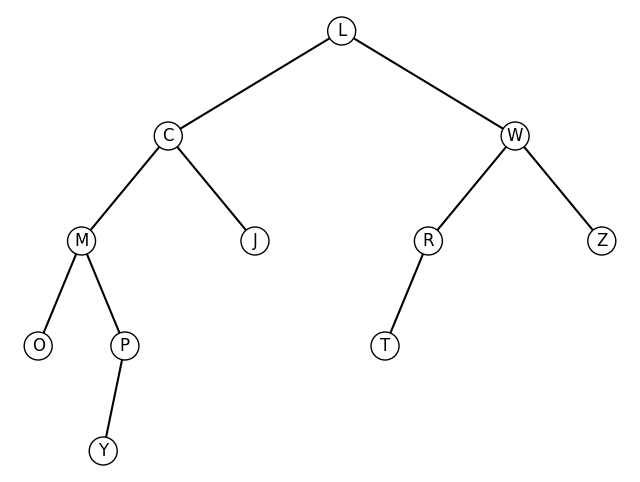

In [73]:
#@title Exercice 6.1

n_o = NoeudBinaire("O")
n_y = NoeudBinaire("Y")
n_p = NoeudBinaire("P", n_y)
n_m = NoeudBinaire("M", n_o, n_p)
n_j = NoeudBinaire("J")
n_b = NoeudBinaire("C", n_m, n_j)
n_t = NoeudBinaire("T")
n_r = NoeudBinaire("R", n_t)
n_z = NoeudBinaire("Z")
n_w = NoeudBinaire("W", n_r, n_z)
n_l = NoeudBinaire("L", n_b, n_w)

un_arbre = ArbreBinaire(n_l)

dessiner_arbre(un_arbre)

In [74]:
#@title Exercice 6.2

# Pas de code à réaliser ici:
# Voici les réponses aux questions:

# Quelle est la racine de l’arbre ?
# L

# Quel noeud est le père de J?
# C

# Quels sont les fils de M?
# O et P

# Quel est le degré de R?
# 1

# Quel est le chemin entre la racine et T?
# [W, R, T]

# Combien y a-t-il de feuilles dans cet arbre?
# 5

# Combien y a-t-il de noeuds sur le niveau 2?
# 4

# Est-ce que C est un noeud interne ou une feuille?
# interne

# Quels sont les descendants de W?
# R et T

# Est-ce que cet arbre est équilibré ou dégénéré?

# Relativement équilibré. Il y a 11 noeuds, le plafond du logarithme en base 2 de 11 est 4. Il a
# 5 niveaux. Il n'est pas nécessaire d'être exactement sur log(n) pour que l'arbre soit équilibré.
# L'arbre rouge-noir (un type d'arbre binaire de fouille) va jusqu'à 2 log(n).

In [75]:
#@title Exercice 6.3

print(un_arbre.calculer_hauteur())

4


In [76]:
#@title Exercice 6.4

print(un_arbre.contient("M"))
print(un_arbre.contient("B"))

True
False


In [77]:
#@title Exercice 6.5

print(un_arbre.parcours_prefixe())
print(un_arbre.parcours_infixe())
print(un_arbre.parcours_postfixe())


['L', 'C', 'M', 'O', 'P', 'Y', 'J', 'W', 'R', 'T', 'Z']
['O', 'M', 'Y', 'P', 'C', 'J', 'L', 'T', 'R', 'W', 'Z']
['O', 'Y', 'P', 'M', 'J', 'C', 'T', 'R', 'Z', 'W', 'L']


In [78]:
#@title Exercice 6.6

print(un_arbre.parcours_largeur())

['L', 'C', 'W', 'M', 'J', 'R', 'Z', 'O', 'P', 'T', 'Y']


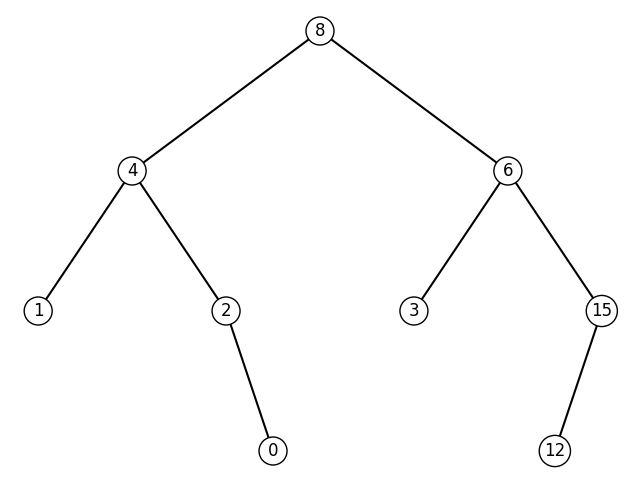

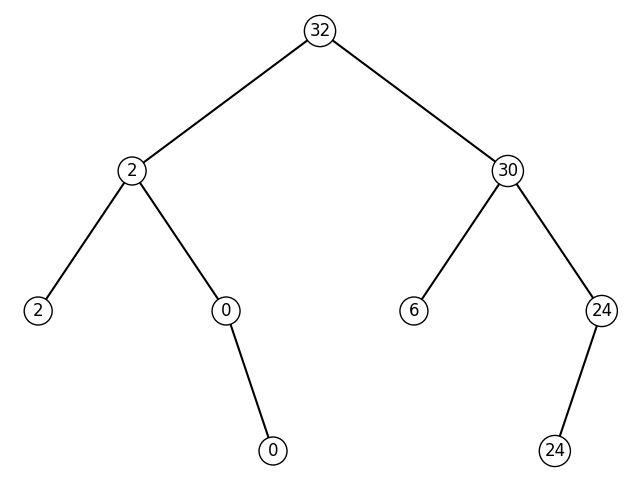

In [79]:
#@title Exercice 6.7

def traitement_question_7(arbre:ArbreBinaire) -> None:

    def parcours(noeud:NoeudBinaire) -> None:
        # Il faut faire un parcours postfixe. La valeur des fils doivent
        # être calculés avant les noeuds internes.
        if noeud != None:
            parcours(noeud.get_gauche())
            parcours(noeud.get_droite())
            if noeud.get_degre() == 0:
                valeur = noeud.get_element()
                valeur = valeur * 2
                noeud.set_element(valeur)
            else:
                somme = 0
                if noeud.get_gauche():
                    somme += noeud.get_gauche().get_element()
                if noeud.get_droite():
                    somme += noeud.get_droite().get_element()
                noeud.set_element(somme)

    parcours(arbre.get_racine())


# Création de l'arbre initial
n_1 = NoeudBinaire(1)
n_0 = NoeudBinaire(0)
n_2 = NoeudBinaire(2, droite=n_0)
n_4 = NoeudBinaire(4, n_1, n_2)
n_3 = NoeudBinaire(3)
n_12 = NoeudBinaire(12)
n_15 = NoeudBinaire(15, n_12)
n_6 = NoeudBinaire(6, n_3, n_15)
n_8 = NoeudBinaire(8, n_4, n_6)
arbre_nombres = ArbreBinaire(n_8)
dessiner_arbre(arbre_nombres)

traitement_question_7(arbre_nombres)
dessiner_arbre(arbre_nombres)

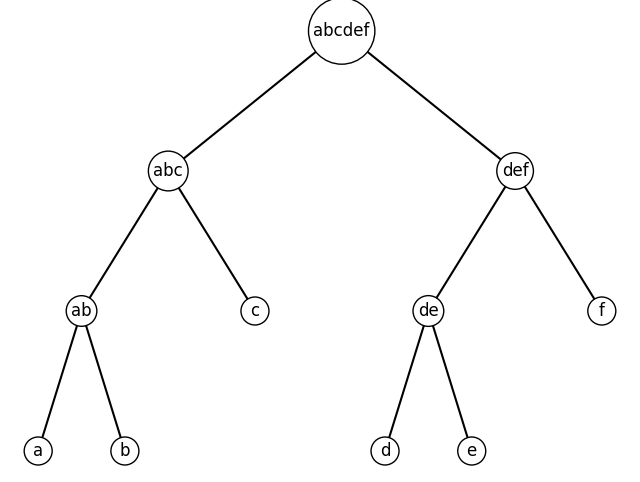

In [102]:
#@title Exercice 6.8

def construire_arbre(chaine) -> ArbreBinaire:

    def creer_arbre(sous_chaine) -> NoeudBinaire:
        noeud = NoeudBinaire(sous_chaine)
        if len(sous_chaine) > 1:
            milieu = (len(sous_chaine) + 1) // 2   # +1 car on veut un élément de plus à droite si c'est impair.
            n_g = creer_arbre(sous_chaine[:milieu])
            if n_g:
                noeud.set_gauche(n_g)
            n_d = creer_arbre(sous_chaine[milieu:])
            if n_d:
                noeud.set_droite(n_d)
        elif len(sous_chaine) == 0:
            return None
        return noeud


    racine = creer_arbre(chaine)
    return ArbreBinaire(racine)

arbre_chaine = construire_arbre("abcdef")
dessiner_arbre(arbre_chaine)

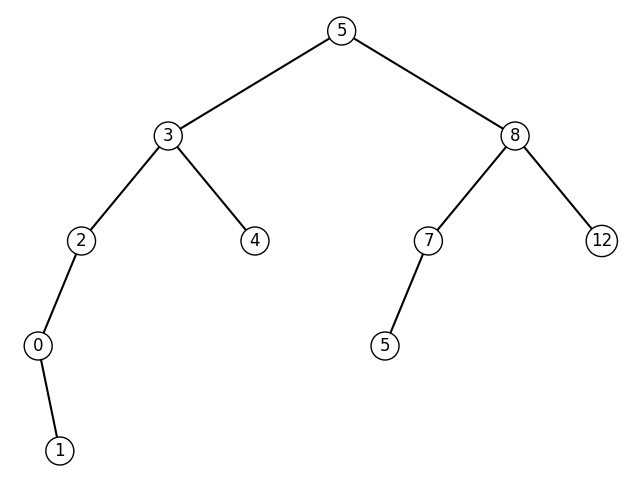

C'est un abf


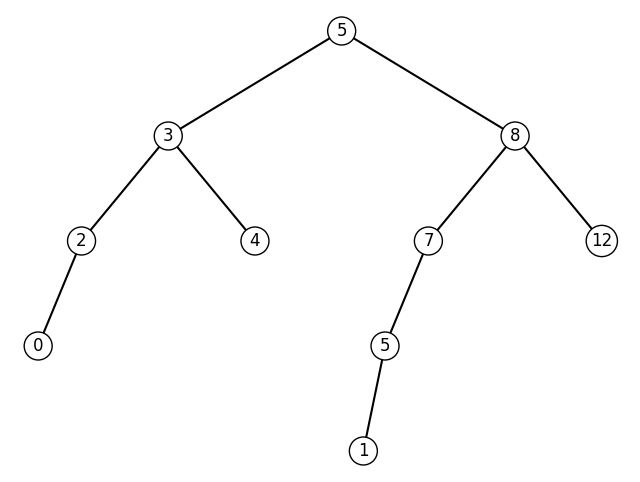

Ce n'est pas un abf


In [107]:
#@title Exercice 6.9

def afficher_si_abf(arbre:ArbreBinaire) -> None:
    ordre_infixe = arbre.parcours_infixe()
    if sorted(ordre_infixe) == ordre_infixe:    # Pourrait faire une fonction qui vérifie si c'est trié au lieu de copier la liste mais flemme...
        print("C'est un abf")
    else:
        print("Ce n'est pas un abf")


n_1 = NoeudBinaire(1)
n_0 = NoeudBinaire(0, droite= n_1)
n_2 = NoeudBinaire(2, n_0)
n_4 = NoeudBinaire(4)
n_3 = NoeudBinaire(3, n_2, n_4)
n_5b = NoeudBinaire(5)
n_7 = NoeudBinaire(7, n_5b)
n_12 = NoeudBinaire(12)
n_10 = NoeudBinaire(10, droite=n_12)
n_8 = NoeudBinaire(8, n_7, n_12)
n_5a = NoeudBinaire(5, n_3, n_8)

abf = ArbreBinaire(n_5a)
dessiner_arbre(abf)
afficher_si_abf(abf)

n_0 = NoeudBinaire(0)
n_2 = NoeudBinaire(2, n_0)
n_4 = NoeudBinaire(4)
n_3 = NoeudBinaire(3, n_2, n_4)
n_1 = NoeudBinaire(1)
n_5b = NoeudBinaire(5, n_1)
n_7 = NoeudBinaire(7, n_5b)
n_12 = NoeudBinaire(12)
n_10 = NoeudBinaire(10, droite=n_12)
n_8 = NoeudBinaire(8, n_7, n_12)
n_5a = NoeudBinaire(5, n_3, n_8)
pas_abf = ArbreBinaire(n_5a)
dessiner_arbre(pas_abf)
afficher_si_abf(pas_abf)


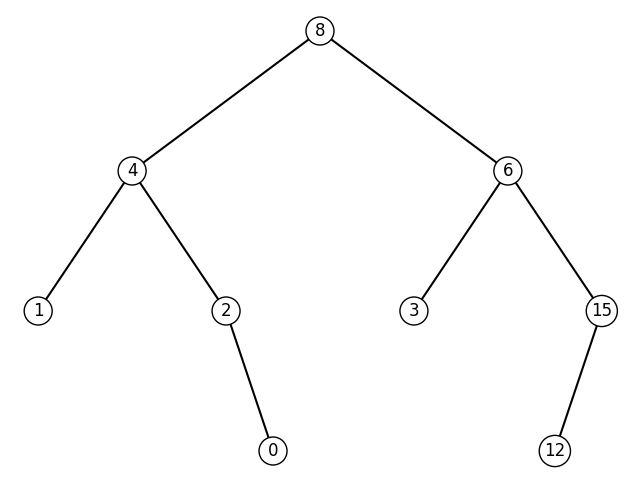

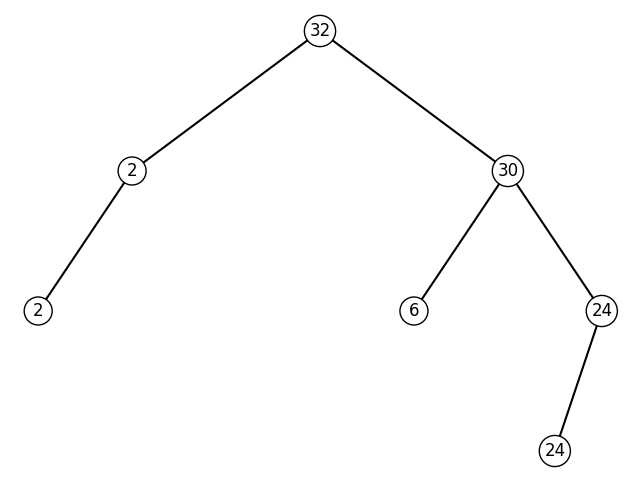

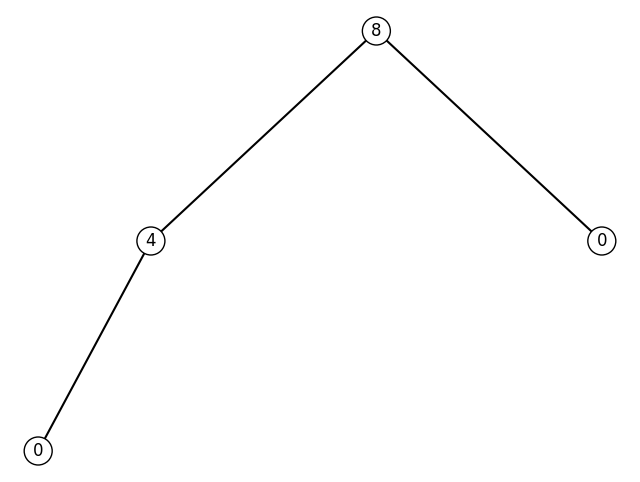

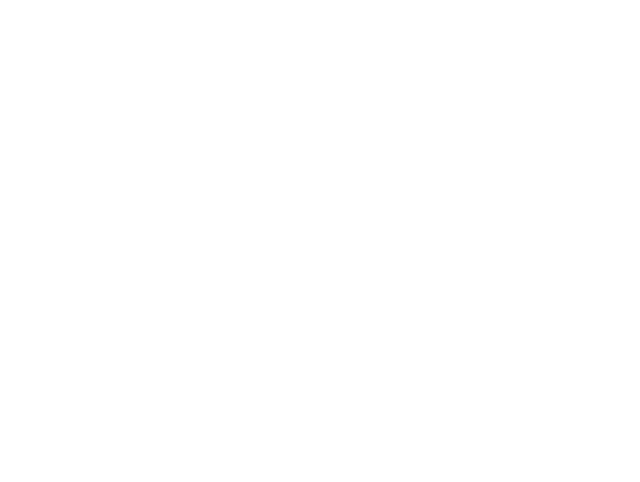

In [119]:
#@title Exercice 6.10

def traitement_question_10(arbre:ArbreBinaire) -> None:

    def parcours(noeud:NoeudBinaire) -> None:
        # Il faut faire un parcours postfixe. La valeur des fils doivent
        # être calculés avant les noeuds internes.
        if noeud != None:
            parcours(noeud.get_gauche())
            parcours(noeud.get_droite())
            if noeud.get_degre() == 0:
                valeur = noeud.get_element()
                valeur = valeur * 2
                noeud.set_element(valeur)
            else:
                somme = 0
                if noeud.get_gauche():
                    somme += noeud.get_gauche().get_element()
                if noeud.get_droite():
                    somme += noeud.get_droite().get_element()
                noeud.set_element(somme)
            if (not noeud.get_gauche()) or (not noeud.get_gauche().get_element()):
                noeud.set_gauche(None)
            if (not noeud.get_droite()) or (not noeud.get_droite().get_element()):
                noeud.set_droite(None)

    parcours(arbre.get_racine())
    if (not arbre.get_racine()) or (not arbre.get_racine().get_element()):
        arbre.set_racine(None)





# Création de l'arbre initial
n_1 = NoeudBinaire(1)
n_0 = NoeudBinaire(0)
n_2 = NoeudBinaire(2, droite=n_0)
n_4 = NoeudBinaire(4, n_1, n_2)
n_3 = NoeudBinaire(3)
n_12 = NoeudBinaire(12)
n_15 = NoeudBinaire(15, n_12)
n_6 = NoeudBinaire(6, n_3, n_15)
n_8 = NoeudBinaire(8, n_4, n_6)
arbre_nombres = ArbreBinaire(n_8)
dessiner_arbre(arbre_nombres)

traitement_question_10(arbre_nombres)
dessiner_arbre(arbre_nombres)

# Création de l'arbre qui disparaît
n_0a = NoeudBinaire(0)
n_4 = NoeudBinaire(4, n_0a)
n_0b = NoeudBinaire(0)
n_8 = NoeudBinaire(8, n_4, n_0b)
arbre_0 = ArbreBinaire(n_8)
dessiner_arbre(arbre_0)

traitement_question_10(arbre_0 )
dessiner_arbre(arbre_0)
